<a href="https://colab.research.google.com/github/Aravind2722/First-code/blob/main/Major_proj_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Major Project on NLP by Aravind Kumar S

In [66]:
import pandas as pd
df = pd.read_table("/content/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


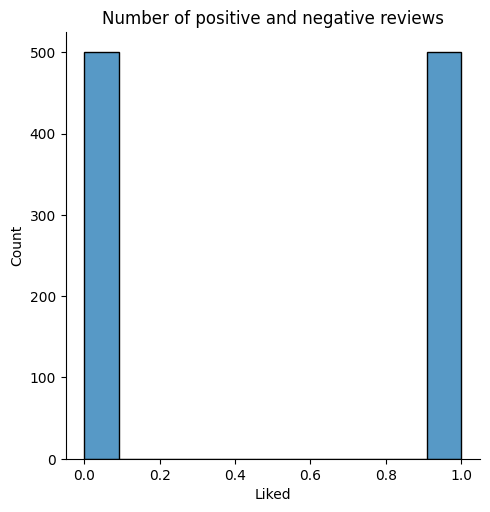

In [68]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df["Liked"])
plt.title("Number of positive and negative reviews")
plt.show()

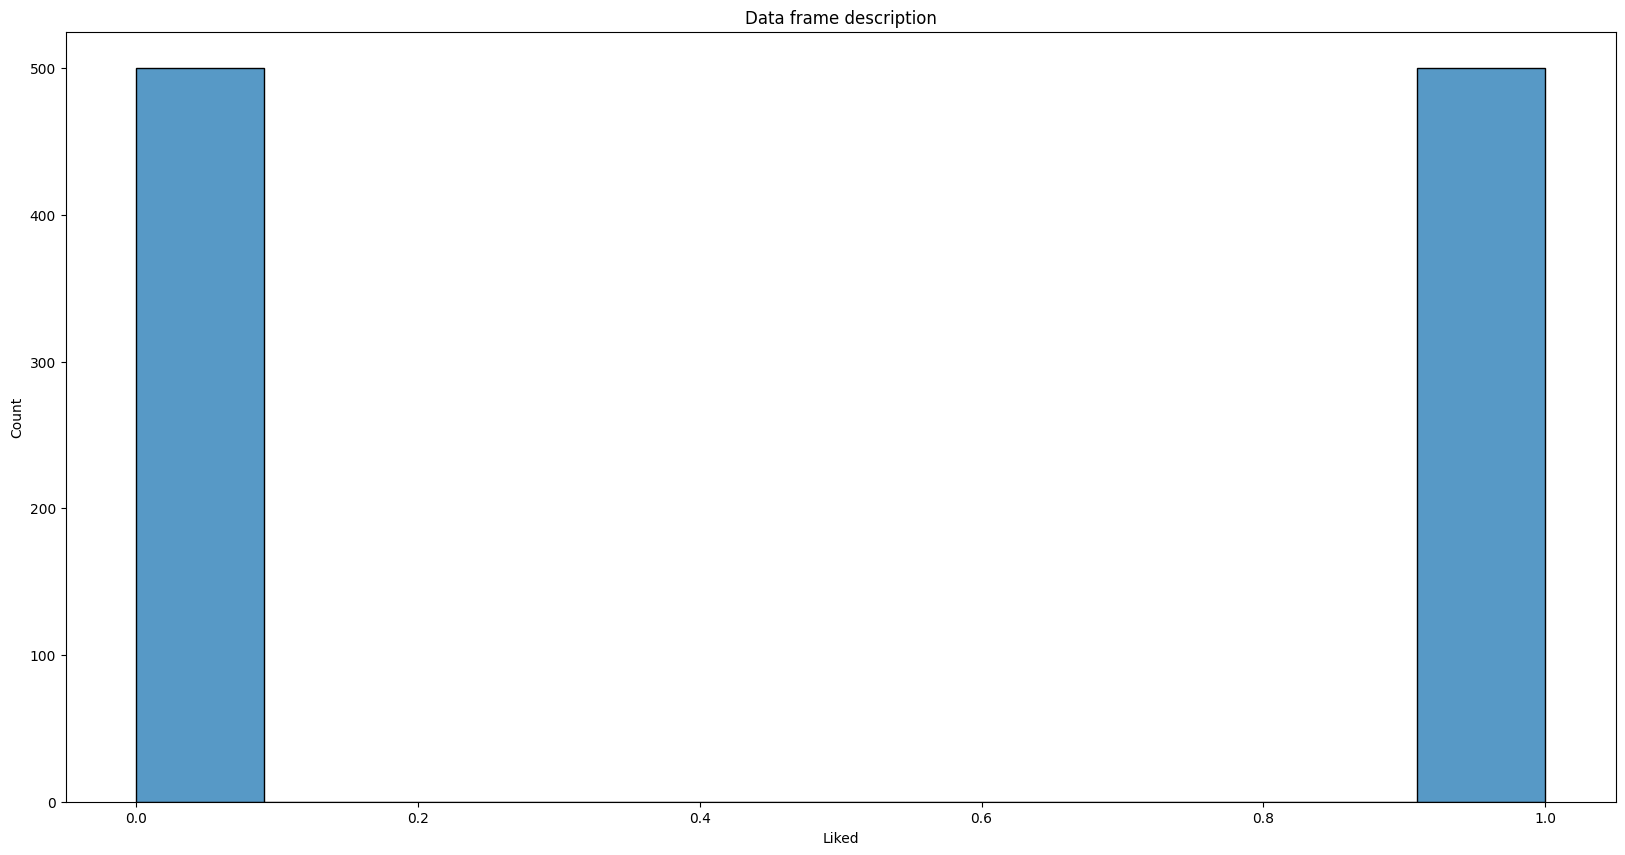

In [69]:
plt.figure(figsize =(20,10) )
sns.histplot(df["Liked"])
plt.title("Data frame description")
plt.show()

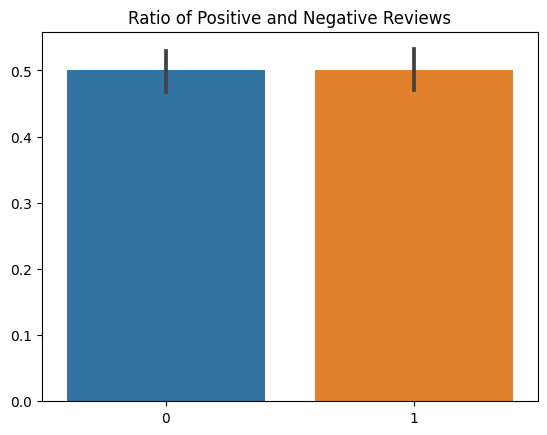

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
ratio = pd.get_dummies(df["Liked"].values)
ratio
sns.barplot(data = ratio)
plt.title("Ratio of Positive and Negative Reviews")
plt.show()

In [71]:
# To check whether the dataset is balanced or unbalanced
df.iloc[:,1].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [72]:
# spliting input and outpt from the dataset
x = df["Review"].values
y = df["Liked"].values

In [73]:
# Splitting up training data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

# **Applying Count Vectorizer**

In [74]:
# Applying Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = "english")
x_train_count_vect = count_vect.fit_transform(x_train)
x_test_count_vect = count_vect.transform(x_test)

# **Support Vector Machine using CountVectorizer**

In [75]:
from sklearn.svm import SVC
svm_cv_model = SVC()
svm_cv_model.fit(x_train_count_vect,y_train)

SVC()

In [76]:
y_pred_cv_svm = svm_cv_model.predict(x_test_count_vect)
y_pred_cv_svm

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0])

In [77]:
# Checking accuracy for " SVM using Count Vectorizer "
from sklearn.metrics import accuracy_score
svm_cv_accuracy = accuracy_score(y_pred_cv_svm,y_test)
svm_cv_accuracy

0.72

In [78]:
# Applying manual inputs
import numpy as np
review1 = ["such a good place and the food was delighfully tasty,it a must visit restaurant"]
review2 = ["worst ever place i have ever met,very bad location, food tasted awful and service was not good, totally disapointed, wasteful experience"]
reviews = np.array((review1+review2))
reviews = count_vect.transform(reviews)
svm_cv_model.predict(reviews)


array([1, 0])

# **Naive Bayes classification using Count Vectorizer**

In [79]:
from sklearn.naive_bayes import MultinomialNB
bayes_cv_model = MultinomialNB()
bayes_cv_model.fit(x_train_count_vect,y_train)

MultinomialNB()

In [80]:
y_pred_cv_bayes = bayes_cv_model.predict(x_test_count_vect)
y_pred_cv_bayes

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [81]:
# Checking accuracy of " Naive Bayes Classification using Count Vectorizer "
from sklearn.metrics import accuracy_score
bayes_cv_accuracy = accuracy_score(y_pred_cv_bayes,y_test)
bayes_cv_accuracy


0.744

In [82]:
# Checking with manual inputs
review1 = ["worst experience, expected more, very disappointed"]
review2 = ["new dishes were served, the place was simply awesome, and food was delicious"]
reviews = np.array((review1+review2))
reviews = count_vect.transform(reviews)
bayes_cv_model.predict(reviews)

array([0, 1])

# **Applying TF IDF Vectorizer**

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(stop_words="english")
x_train_tfidf_vect = tfidf_vect.fit_transform(x_train)
x_test_tfidf_vect = tfidf_vect.transform(x_test)

# **Support Vector Machine using TF IDF Vectorizer**

In [84]:
from sklearn.svm import SVC
svm_tfidf_model = SVC()
svm_tfidf_model.fit(x_train_tfidf_vect,y_train)


SVC()

In [85]:
y_pred_tfidf_svm = svm_tfidf_model.predict(x_test_tfidf_vect)
y_pred_tfidf_svm

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [86]:
# Accuracy of " SVM using TF IDF Vectorizer"
from sklearn.metrics import accuracy_score
svm_tfidf_accuracy = accuracy_score(y_pred_tfidf_svm,y_test)
svm_tfidf_accuracy

0.74

In [87]:
# Applying manual inputs
import numpy as np
review1 = ["worst place, better not to go"]
review2 = ["best place to visit,wonderful food available, delicious in taste"]
reviews = np.array((review1+review2))
reviews = count_vect.transform(reviews)
svm_tfidf_model.predict(reviews)

array([1, 1])

# **Naive Bayes Classification using TF IDF Vectorizer**

In [88]:
from sklearn.naive_bayes import MultinomialNB
bayes_tfidf_model = MultinomialNB()
bayes_tfidf_model.fit(x_train_tfidf_vect,y_train)


MultinomialNB()

In [89]:
y_pred_tfidf_bayes = bayes_tfidf_model.predict(x_test_tfidf_vect)
y_pred_tfidf_bayes

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [90]:
# Checking accuracy of " Naive Bayes Classification using TF IDF Vectorizer "
from sklearn.metrics import accuracy_score
bayes_tfidf_accuracy = accuracy_score(y_pred_tfidf_bayes,y_test)
bayes_tfidf_accuracy

0.744

In [91]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
reviews = count_vect.transform(reviews)
bayes_tfidf_model.predict(reviews)

array([1, 0])

# **Support Vector Machine using Pipeline**

In [92]:
# Pipeline (Countvectorizer(),SVC())
from sklearn.pipeline import make_pipeline
svm_cv_pipeline_model = make_pipeline(CountVectorizer(),SVC())
svm_cv_pipeline_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [93]:
y_pred_cv_pipeline_svm = svm_cv_pipeline_model.predict(x_test)
y_pred_cv_pipeline_svm

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [94]:
# Accuracy of " SVM using pipeline(CV) "
from sklearn.metrics import accuracy_score
svm_cv_pipeline_accuracy = accuracy_score(y_pred_cv_pipeline_svm,y_test)
svm_cv_pipeline_accuracy

0.792

In [95]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
svm_cv_pipeline_model.predict(reviews)

array([1, 0])

In [96]:
# Pipeline (Tfidfvectorizer(),SVC())
from sklearn.pipeline import make_pipeline
svm_tfidf_pipeline_model = make_pipeline(TfidfVectorizer(),SVC())
svm_tfidf_pipeline_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [97]:
y_pred_tfidf_pipeline_svm = svm_tfidf_pipeline_model.predict(x_test)
y_pred_tfidf_pipeline_svm

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [98]:
# Accuracy of " SVM using pipeline(Tfidf) "
from sklearn.metrics import accuracy_score
svm_tfidf_pipeline_accuracy = accuracy_score(y_pred_tfidf_pipeline_svm,y_test)
svm_tfidf_pipeline_accuracy

0.82

In [99]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
svm_tfidf_pipeline_model.predict(reviews)

array([1, 0])

# **Naive Bayes Classification using pipeline**

In [100]:
# Pipeline (Countvectorizer(),MutinomailNB())
from sklearn.pipeline import make_pipeline
bayes_cv_pipeline_model = make_pipeline(CountVectorizer(),MultinomialNB())
bayes_cv_pipeline_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [101]:
y_pred_cv_pipeline_bayes = bayes_cv_pipeline_model.predict(x_test)
y_pred_cv_pipeline_bayes

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [102]:
# Accuracy of " Bayes model using pipeline(CV) "
from sklearn.metrics import accuracy_score
bayes_cv_pipeline_accuracy = accuracy_score(y_pred_cv_pipeline_bayes,y_test)
bayes_cv_pipeline_accuracy

0.784

In [103]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
bayes_cv_pipeline_model.predict(reviews)

array([1, 0])

In [104]:
# Pipeline (Tfidfvectorizer(),MultinomialNB())
from sklearn.pipeline import make_pipeline
bayes_tfidf_pipeline_model = make_pipeline(TfidfVectorizer(),MultinomialNB())
bayes_tfidf_pipeline_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [105]:
y_pred_tfidf_pipeline_bayes = bayes_tfidf_pipeline_model.predict(x_test)
y_pred_tfidf_pipeline_bayes

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [106]:
# Accuracy of " Bayes model using pipeline(Tfidf) "
from sklearn.metrics import accuracy_score
bayes_tfidf_pipeline_accuracy = accuracy_score(y_pred_tfidf_pipeline_bayes,y_test)
bayes_tfidf_pipeline_accuracy

0.796

In [107]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
bayes_tfidf_pipeline_model.predict(reviews)

array([1, 0])

# **Logistic Regression**

In [108]:
# Logistic Regression using Count Vectorizer
from sklearn.linear_model import LogisticRegression
log_reg_cv_model = LogisticRegression()
log_reg_cv_model.fit(x_train_count_vect,y_train)
y_pred_log_reg_cv_model = log_reg_cv_model.predict(x_test_count_vect)
y_pred_log_reg_cv_model

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [109]:
from sklearn.metrics import accuracy_score
log_reg_cv_accuracy = accuracy_score(y_pred_log_reg_cv_model,y_test)
log_reg_cv_accuracy

0.74

In [110]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
reviews = count_vect.transform(reviews)
log_reg_cv_model.predict(reviews)

array([1, 0])

In [111]:
# Logistic Regression using TF IDF Vectorizer
from sklearn.linear_model import LogisticRegression
log_reg_tfidf_model = LogisticRegression()
log_reg_tfidf_model.fit(x_train_tfidf_vect,y_train)
y_pred_log_reg_tfidf_model = log_reg_tfidf_model.predict(x_test_tfidf_vect)
y_pred_log_reg_tfidf_model

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0])

In [112]:
from sklearn.metrics import accuracy_score
log_reg_tfidf_accuracy = accuracy_score(y_pred_log_reg_tfidf_model,y_test)
log_reg_tfidf_accuracy

0.728

In [113]:
# Checking with manual inputs
review1 = ["very good experience, beautiful location with delightful food"]
review2 = ["old recipies, not soo good, not worthy for money"]
reviews = np.array((review1+review2))
reviews = count_vect.transform(reviews)
log_reg_tfidf_model.predict(reviews)

array([1, 1])

In [114]:
# Logistic Regression with pipeline of Count Vectorizer
from sklearn.pipeline import make_pipeline
log_cv_pipeline_model = make_pipeline(CountVectorizer(),LogisticRegression())
log_cv_pipeline_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression())])

In [115]:
y_pred_cv_pipeline_log = log_cv_pipeline_model.predict(x_test)
y_pred_cv_pipeline_log

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [116]:
from sklearn.metrics import accuracy_score
log_cv_pipeline_accuracy = accuracy_score(y_pred_cv_pipeline_log,y_test)
log_cv_pipeline_accuracy

0.812

In [117]:
# Logistic regression with pipeline of Tfidf Vectorizer
from sklearn.pipeline import make_pipeline
log_tfidf_pipeline_model = make_pipeline(TfidfVectorizer(),LogisticRegression())
log_tfidf_pipeline_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [118]:
y_pred_tfidf_pipeline_log = log_tfidf_pipeline_model.predict(x_test)
y_pred_tfidf_pipeline_log

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [119]:
from sklearn.metrics import accuracy_score
log_tfidf_pipeline_accuracy = accuracy_score(y_pred_tfidf_pipeline_log,y_test)
log_tfidf_pipeline_accuracy

0.804

# **Accuracy comparison**

In [120]:
print("SVM using CV                  :   ",svm_cv_accuracy)                # 0.72
print("SVM using TF IDF              :   ",svm_tfidf_accuracy)             # 0.74
print("Bayes using CV                :   ",bayes_cv_accuracy)              # 0.744
print("Bayes using TF IDF            :   ",bayes_tfidf_accuracy)           # 0.744
print("SVM with pipeline of CV       :   ",svm_cv_pipeline_accuracy)       # 0.792
print("SVM with pipeline of TF IDF   :   ",svm_tfidf_pipeline_accuracy)    # 0.82   --  highest accuracy among all
print("Bayes with pipeline of CV     :   ",bayes_cv_pipeline_accuracy)     # 0.784
print("Bayes with pipeline of TF IDF :   ",bayes_tfidf_pipeline_accuracy)  # 0.796
print("Logistic Reg using CV         :   ",log_reg_cv_accuracy)            # 0.74
print("Logistic Reg using TF IDF     :   ",log_reg_tfidf_accuracy)         # 0.728
print("Log Reg piplline with CV      :   ",log_cv_pipeline_accuracy)       # 0.812
print("Log Reg pipeline with TF IDF  :   ",log_tfidf_pipeline_accuracy)    # 0.804

SVM using CV                  :    0.72
SVM using TF IDF              :    0.74
Bayes using CV                :    0.744
Bayes using TF IDF            :    0.744
SVM with pipeline of CV       :    0.792
SVM with pipeline of TF IDF   :    0.82
Bayes with pipeline of CV     :    0.784
Bayes with pipeline of TF IDF :    0.796
Logistic Reg using CV         :    0.74
Logistic Reg using TF IDF     :    0.728
Log Reg piplline with CV      :    0.812
Log Reg pipeline with TF IDF  :    0.804


# **Saving the model using JOBLIB**

In [121]:
import joblib
joblib.dump(svm_tfidf_pipeline_model,"Sentiment Analyser")

['Sentiment Analyser']

In [122]:
# Reloading the model for predicting inputs
reloaded_model = joblib.load("/content/Sentiment Analyser")
reloaded_model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [123]:
# Predicting with the reloaded model
input = "best retaurant i have ever been to"
reloaded_model.predict([input])

array([1])

# **Streamlit web app**

In [124]:
!pip install streamlit --quiet

In [125]:
%%writefile app.py
import streamlit as st
import joblib
st.title("Sentiment Analyzer")
reloaded_model = joblib.load("Sentiment Analyser")
input_message = st.text_input("Enter the message: ")
output = reloaded_model.predict([input_message])
output_message = ["Negative:(","Positive:)"]
if st.button("Predict"):
  st.title(output_message[output[0]])

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 7ed2aeb275cd742


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.225.155.252:8501

npx: installed 22 in 2.454s
your url is: https://curly-bugs-flow.loca.lt


# **Sentiment analysis and Twitter Sentiments**

In [ ]:
# Sentiment Analysis is a Machine Learning method which is used to analyse the emotions through texts.
# It is an approach of Natural Language Processing.
# It is also called as opinion mining.
# Sentiment analysis is a popular way for organizations to determine and categorize opinions about a product, service, or idea.
# Applications of Sentiment Analysis:
#                                  1. Identifying brand awareness, reputation and popularity at a specific moment or over time.
#                                  2. Tracking consumer reception of new products or features.
#                                  3. Evaluating the success of a marketing campaign etc.....
# General steps followed in sentiment analysis:
#                                  1.Lower casing the words in a text or message
#                                  2.Tokenization of words
#                                  3.Punctuation removal
#                                  4.Normalization of the words (lemmatisation/stemming)
#                                  5.Vectorization
#                                  6.Prediction using various algorithms
# Twitter Analytics shows you how your audience is responding to your content, what's working, and what's not.
# As a part of Natural Language Processing, algorithms like SVM, Naive Bayes is used in predicting the polarity of the sentence. sentiment analysis of Twitter data may also depend upon sentence level and document level.
# Twitter Sentiment analysis is used in business, politics, public actions etc....
# It can be done using libraries like tweepy and textblob
# The general steps that are followed are:
#                                  1.Tokenization
#                                  2.Noun phrase extraction
#                                  3.parts of speech tagging
#                                  4.N-gramming etc......

